In [34]:
# Q2(a)
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as s
import math as math
import matplotlib.pyplot as plt
df = pd.read_csv('hmda-2016.csv')


# Q2(b)
dfs = df.sample(frac = 0.8, replace = False, random_state = 1)
dfs.columns =  ["year", "id", "agency", "loanType", "propType", "loanPurpose", "occupancy", "amount", "action",
                     "msa", "state", "county", "tract", "appEth", "appRace1", "appSex", "income", "purchaserType",
                     "editStatus", "tractMSAInc", "numOwnerOccUnits", "num1to4FamUnits"]


Sampling without replacement is important because we could obtain a unique subset of data.

In [ ]:

# Q2(c)
dfs = dfs[(dfs['editStatus'] == " ") & (dfs['loanPurpose'] == 1) & (dfs['msa'] != "NA") & 
          (dfs['occupancy'] == 1) & (dfs['propType'] == 1) & (dfs['income'] != "NA  ") & 
          (dfs['income'] != "NA")]

In [35]:
# Q2(d)
dfs['denied'] = (dfs['action'] == 3).astype(int)
dfs['amount'] = dfs['amount'].astype(float)
dfs['income'] = dfs['income'].astype(float)
dfs['lti'] = dfs['amount'] / dfs['income']
dfs['AAH'] = (dfs['appEth'] == 1).astype(int)|(dfs['appRace1'] == 3).astype(int)

In [36]:
# Q2(e)
x = sm.add_constant(np.array(dfs['lti']))
y = np.array(dfs['denied'])
resultLogit = sm.Logit(y,x).fit()
print(resultLogit.summary2())
coefficient = resultLogit.params


Optimization terminated successfully.
         Current function value: 0.282519
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.003     
Date:               2023-10-22 17:11 AIC:              22658.6202
No. Observations:   40094            BIC:              22675.8182
Df Model:           1                Log-Likelihood:   -11327.   
Df Residuals:       40092            LL-Null:          -11365.   
Converged:          1.0000           LLR p-value:      3.1634e-18
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.5857     0.0309   -83.7544   0.0000   -2.6462   -2.5252
x1        0.0559     0.0082     6.8607   0.0000    0.0400 

Beta_0 is equal to -2.5857.
Beta_1 is equal to 0.0559.

In [37]:
predLogit = 1 / (1 + np.exp(-np.sum(x * resultLogit.params, axis = 1)))

# Q2(f)
The sign of the coefficient on the borrower's loan-to-income ratio(LTI) is positive, which means the higher the LTI is, a higher probablity that the borrower would be denied. For example, low income could lead to a high LTI, therefore, those loan agency has really low probability to approve the applicant with low income, because they have much higher probability to default. The advantage to use an OLS regression to estimate the probability of loan denial is that it is more easily to interpret the results.

In [33]:
#Q2(g)
x2 = sm.add_constant(np.transpose(np.array([dfs['lti'],dfs['AAH']])))
y = np.array(dfs['denied'])
resultLogit2 = sm.Logit(y,x2).fit()
print(resultLogit2.summary2())



Optimization terminated successfully.
         Current function value: 0.280794
         Iterations 7
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.009     
Date:               2023-10-22 17:03 AIC:              22522.3284
No. Observations:   40094            BIC:              22548.1253
Df Model:           2                Log-Likelihood:   -11258.   
Df Residuals:       40091            LL-Null:          -11365.   
Converged:          1.0000           LLR p-value:      3.2649e-47
No. Iterations:     7.0000           Scale:            1.0000    
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.6801     0.0317   -84.5509   0.0000   -2.7422   -2.6179
x1        0.0501     0.0079     6.3534   0.0000    0.0347 

Beta_0 is equal to -2.6801.
Beta_1 is equal to 0.0501.
Beta_2 is equal to 0.5105.

In [ ]:
predLogit2 = 1 / (1 + np.exp(-np.sum(x2 * resultLogit2.params, axis = 1)))

# Q2(h)
The sign of the coefficient on the borrower's status as African-American or Hispanic is positive, but it cannot provide evidence that lenders practice racial discrimination. Some additional avariables such as the gender or the age of the loan applicant, would be needed to test whether loan officers indeed discriminate against African-American or Hispanic borrowers.


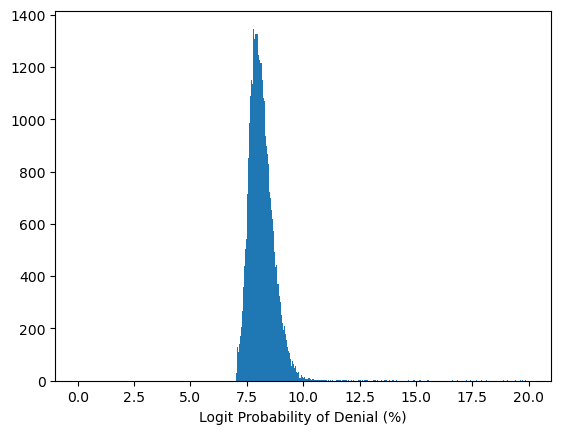

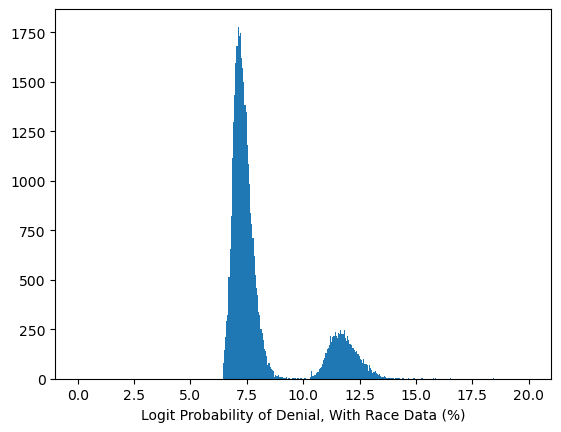

In [41]:
# Q2(i)
plot = plt.hist(100 / (1 + np.exp(- np.sum(x * resultLogit.params, axis = 1))), bins = 'auto', 
               range = (0, 20))
plt.xlabel("Logit Probability of Denial (%)")
plt.savefig("logit-denied-LTI.png")

plt.show()

plot = plt.hist(100 / (1 + np.exp(- np.sum(x2 * resultLogit2.params, axis = 1))), bins = 'auto', 
               range = (0, 20))
plt.xlabel("Logit Probability of Denial, With Race Data (%)")
plt.savefig("logit-denied-LTI-minority.png")

plt.show()



These two distributions look different because we use different random variables to do the regression. In (e), we only used LTI, but in (g), we used both the LTI and the AAH(the race). The second model provides a more accurate prediction, because it used more factors in to generate the regression model.

# Q2(j)
For the non-owner-occupied properties, there is another part of income, the rental income, and it would result in a change in the loan-to-income ratio. However, it is hard to collect the rental income, so the ability of the applicants of non-owner-occupied properties to pay the loan is difficult to decide. 